In [14]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

# Starting point: documentation

https://qutip.org/docs/4.1/guide/dynamics/dynamics-floquet.html

Let's try out their example of the driving of a TLS. 

In principle, we should be able to reproduce the Stark shift, for example, including Bloch-Siergert contributions.

Note also that I still believe that Floquet should be divergent for driving a linear mode, such as a Harmonic oscillator. In any case, I'll see what happens. I'll also check the Kerr oscillator, and the "quantum" and "classical" regimes where there should be a crossover in the frequency shift direction once we reach driving detunings larger than the (single photon) anharmonicity. 


In [28]:
delta = 0.2 * 2*np.pi
eps0 = 1.0 * 2*np.pi
A = 2.5 * 2*np.pi
omega = 1.0 * 2*np.pi

H0 = - delta/2.0 * sigmax() - eps0/2.0 * sigmaz()
H1 = A/2.0 * sigmaz()
args = {'w': omega}
H = [H0, [H1, 'sin(w * t)']]

T = 2*np.pi / omega
f_modes_0, f_energies = floquet_modes(H, T, args)

Question already: why is this the Hamiltonian of a two-level atom? What is \Delta? Why is the driving in the z-direction? And what is eps0? 

OK, code on qutip page does not work "out of box" for the loop...

In [29]:
omega = 1.0 * 2*np.pi
A_vec = np.linspace(0, 10, 100) * omega
T = (2*np.pi)/omega

q_energies = np.zeros((len(A_vec), 2))
H0 = delta/2.0 * sigmaz() - eps0/2.0 * sigmax()
args = {'w': omega}

for idx, A in enumerate(A_vec):
    H1 = A/2.0 * sigmax()
    H = [H0, [H1, 'sin(w * t)']]
    f_modes, f_energies = floquet_modes(H, T, args, True)
    q_energies[idx,:] = f_energies

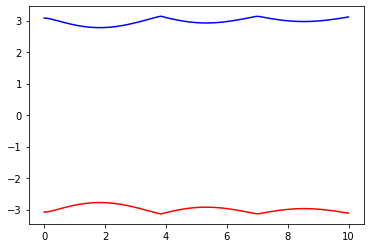

In [30]:
plt.plot(A_vec/omega, q_energies[:,0], 'b')
plt.plot(A_vec/omega, q_energies[:,1], 'r')

And this plot does not look like the one on the webpage? 

Not that I understand why it would look like the one on the webpage anyway...

OK, we'll let's see if I can find anything that makes sense. 

# Try on my own: "normal" TLS with $\sigma_x$ driving

This Hamiltonian make more sense to me:

$$
H = \Delta \sigma_z + \epsilon \sigma_x \cos(\omega t)
$$

* $\Delta$ is the splitting of the TLS energies
* $\epsilon$ is the driving strength
* $\omega$ is the driving frequency

..............................

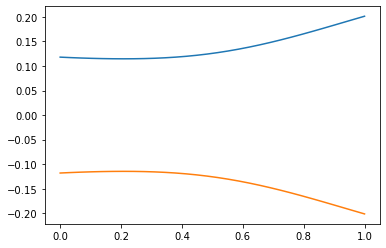

In [54]:
Nd = 30

# Level splitting
delta = 1 * 2*np.pi
# Sweep driving from zero up to level splitting
eps = np.linspace(0,1,Nd) * delta
# Resonant driving 
omega = delta*0.9

H0 = delta/2.0 * sigmaz() - eps0 * sigmax()

q_energies = np.zeros((Nd,2))

for i,e in enumerate(eps):
    H1 = e * sigmax()
    H = [H0, [H1, 'sin(w * t)']]
    args = {'w': omega}
    f_modes, f_energies = floquet_modes(H, T, args)
    q_energies[i,:] = f_energies
    print(".", end="")

plt.plot(eps/delta,q_energies[:,0]/delta)
plt.plot(eps/delta,q_energies[:,1]/delta)

..............................

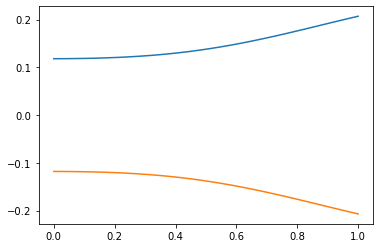

In [57]:
Nd = 30

# Level splitting
delta = 1 * 2*np.pi
# Sweep driving from zero up to level splitting
eps = np.linspace(0,1,Nd) * delta
# Resonant driving 
omega = delta

H0 = delta/2.0 * sigmaz() - eps0 * sigmax()

q_energies = np.zeros((Nd,2))

for i,e in enumerate(eps):
    H1 = e * sigmax()
    H = [H0, [H1, 'sin(w * t)']]
    args = {'w': omega}
    f_modes, f_energies = floquet_modes(H, T, args)
    q_energies[i,:] = f_energies
    print(".", end="")

plt.plot(eps/delta,q_energies[:,0]/delta)
plt.plot(eps/delta,q_energies[:,1]/delta)

OK, I don't understand any of this. 